<a href="https://colab.research.google.com/github/data602sps/assignments/blob/master/05_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 8**

# **Weeks 10 & 11 - matplotlib & seaborn**
* In this homework assignment, you will explore and analyze a public dataset of your choosing. Since this assignment is “open-ended” in nature, you are free to expand upon the requirements below. However, you must meet the minimum requirments as indicated in each section. 


* The preferred method for this analysis is in a .ipynb file. Feel free to use whichever platform of your choosing.  


### **Some data examples:**
•	https://www.data.gov/

•	https://opendata.cityofnewyork.us/

•	https://datasetsearch.research.google.com/

•	https://archive.ics.uci.edu/ml/index.php

### **Resources:**

•	https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html 

•	https://www.oreilly.com/library/view/python-data-science/9781491912126/ch04.html

•	https://www.data-to-viz.com/



### **Headings or comments**
**You are required to make use of comments, or headings for each section.  You must explain what your code is doing, and the results of running your code.**  Act as if you were giving this assignment to your manager - you must include clear and descriptive information for each section.

### **You may work as a group or indivdually on this assignment.**


# Introduction

In this section, please describe the dataset you are using.  Include a link to the source of this data.  You should also provide some explanation on why you choose this dataset.

Data: https://catalog.data.gov/dataset/electric-vehicle-population-data
<br>
This is a dataset which has eletric vehicle data registered throgh Washington State Department of Licensing.
<br>
I chose this dataset since it could be interesting to plot after exploring the variables and observations.


In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

______________
# Data Exploration
Import your dataset into your .ipynb, create dataframes, and explore your data.  

Include: 

* Summary statistics means, medians, quartiles, 
* Missing value information
* Any other relevant information about the dataset.  



In [7]:
df = pd.read_csv('Electric_Vehicle_Population_Data.csv')

df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EB2J,Suffolk,Suffolk,VA,23435.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,NaN,476647986,POINT (-76.42443 36.8752),NaN,5.180008e+10
1,5YJ3E1ECXL,Yakima,Yakima,WA,98908.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,14.0,103490145,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
2,WA1LAAGE7M,Yakima,Yakima,WA,98908.0,2021,AUDI,E-TRON,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,222,0,14.0,144941534,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
3,5YJ3E1EA1K,Danville,Danville,VA,24541.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,NaN,168513922,POINT (-79.4172 36.58598),NaN,5.159000e+10
4,1FADP5CU9E,Norfolk,Norfolk,VA,23518.0,2014,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19,0,NaN,150749378,POINT (-76.21549 36.92478),NaN,5.171001e+10


# Summary Statistics

In [8]:
df.shape

(121978, 17)

Using the describe method to output descriptive information about the two columns that we can quantify. 
<br>
I'm going to assume the **electric range** column describes the travel range on full charge.
<br>
The **base msrp** column looks funky because we can see that the first five observations has **0** in the cells.
<br>
We also observe that the mean is only 1627 which shouldn't be accurate. EV articles aren't that inexpensive.

In [14]:
df[['Electric Range', 'Base MSRP']].describe()

,Electric Range,Base MSRP
count,121978.000000,121978.000000
mean,81.301407,1627.059798
std,100.890849,10267.478923
min,0.000000,0.000000
25%,0.000000,0.000000
50%,25.000000,0.000000
75%,200.000000,0.000000
max,337.000000,845000.000000


Checking datatypes and non-null values with .info().

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121978 entries, 0 to 121977
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         121978 non-null  object 
 1   County                                             121976 non-null  object 
 2   City                                               121976 non-null  object 
 3   State                                              121978 non-null  object 
 4   Postal Code                                        121976 non-null  float64
 5   Model Year                                         121978 non-null  int64  
 6   Make                                               121978 non-null  object 
 7   Model                                              121874 non-null  object 
 8   Electric Vehicle Type                              121978 non-null  object

In [21]:
# I was curious why the Dtype for certain columns were displaying as object
# they are strings

df['VIN (1-10)'][0]

'5YJ3E1EB2J'

Checking for duplicated observations - we don't have any in this dataset.

In [16]:
df.duplicated().sum()

0

We see that there **Electric Vehicle Type** is a categorical column with two unique types.
<br>
We can plot something meaningful with electric vehicle types and their respective ranges.
<br>
Or make a plot to highlight the difference in registrations between the EV types.

In [28]:
df['Electric Vehicle Type'].unique()

array(['Battery Electric Vehicle (BEV)',
       'Plug-in Hybrid Electric Vehicle (PHEV)'], dtype=object)

# Data Wrangling

Perform data wrangling.  You are free to use your best judgment here.  If you are stuck, look at previous assignment.

In [64]:
electric_vehicle_count_series = df.groupby(['Electric Vehicle Type'])['Electric Vehicle Type'].count()
electric_vehicle_count_series

Electric Vehicle Type
Battery Electric Vehicle (BEV)            94118
Plug-in Hybrid Electric Vehicle (PHEV)    27860
Name: Electric Vehicle Type, dtype: int64

In [68]:
vehicle_sum = df['Electric Vehicle Type'].count()
vehicle_sum

121978

I don't quite remember how to transmute, or forgot how to work with a series so created a new dataframe to plot instead.
<br>
I wanted to also visualize the percentages for each type of electric vehicle in this dataset.

In [80]:
ev_ratio_df = pd.DataFrame({
    'EV_Type': ['Battery Electric Vehicle (BEV)', 'Plug-in Hybrid Electric Vehicle (PHEV)'],
    'EV_Ratio': [(94118/vehicle_sum), (27860/vehicle_sum)]
})
ev_ratio_df

,EV_Type,EV_Ratio
0,Battery Electric Vehicle (BEV),0.771598
1,Plug-in Hybrid Electric Vehicle (PHEV),0.228402


I noticed some values were 0 in the Electric Range column so I filtered those out because I don't want them in the calculations.
<br>
I also filtered out the Plug-In Hybrid vehicles in this case to focus on 'BEV'.

In [141]:
filtered_df = df[df['Electric Vehicle Type'] == 'Battery Electric Vehicle (BEV)']

filtered_df = df[df['Electric Range'] > 0]

bev_series = filtered_df.groupby('Make')['Electric Range'].mean().sort_values(ascending=False)

In [142]:
bev_series

Make
TESLA                   240.226802
JAGUAR                  234.000000
POLESTAR                233.000000
CHEVROLET               126.953435
HYUNDAI                 117.598592
KIA                     108.166786
VOLKSWAGEN              106.848837
NISSAN                  103.100497
WHEEGO ELECTRIC CARS    100.000000
TH!NK                   100.000000
FIAT                     85.631644
AUDI                     81.998896
PORSCHE                  71.299689
SMART                    62.297794
AZURE DYNAMICS           56.000000
MINI                     53.065625
BMW                      48.774678
HONDA                    46.578947
LEXUS                    37.000000
CADILLAC                 35.481132
FISKER                   33.000000
CHRYSLER                 32.342706
MERCEDES-BENZ            30.428969
MITSUBISHI               26.778716
TOYOTA                   26.291851
FORD                     25.118502
LINCOLN                  23.408602
JEEP                     22.527728
VOLVO          

# Visualizations

The main purpose of this assignment is to practice creating various visualizations using the matplotlib and seaborn library.

### **Part 1:**
Using matplotlib, create ***two or more plots*** that incorporate at least **5** of the following properties:

Note: these properties vary based on your data.  The goal is to practice creating visualizations and modifying its properties. 

*   Use and change a legend position
*   Change a legend font size
*   Place a legend outside of the plot
*   Create a single legend for all subplots
*   Change the title and x/y labels
*   Change the marker, line colors, and line width
*   Add annotations
*   Modify Axis Text Ticks/Labels
*   Change size of axis Labels
*   Your own choice not included above 


Plots that you can create **include**:

*   Scatter Plot
*   Bar plot
*   Line Chart
*   Multi Plots (e.g. using .subplot()
*   Histogram

You can add another plot not listed here if it works better for your data.  This is not a complete list of plots to create.

### Below are two bar plots - one is created with a series and the other one is created with a dataframe.

The first graph is displaying the differences in count between the two types of electric vehicles. 
<br>
BEV vs PHEV

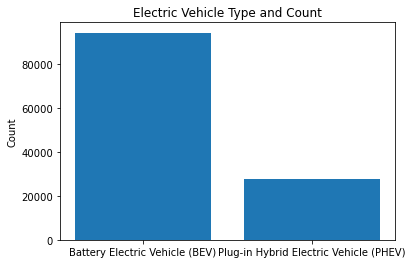

In [143]:
plt.bar(electric_vehicle_count_series.index, electric_vehicle_count_series.values)
plt.title('Electric Vehicle Type and Count')
plt.ylabel('Count')
plt.show()

The second graph is displaying the differences in percentages out of 100% between the two types of electric vehicles.
<br>
BEV vs PHEV

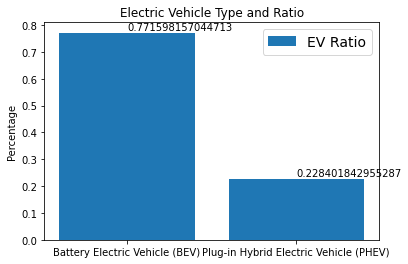

In [144]:
plt.bar('EV_Type', 'EV_Ratio', data=ev_ratio_df)
plt.title('Electric Vehicle Type and Ratio')
# I didn't have to specify an x label because the pre-existing x-label is explanatory.
plt.ylabel('Percentage')

# adding legend and changing font size of the text inside the legend
plt.legend(['EV Ratio'], fontsize = 14)

# add text labels to each bar
for index, row in ev_ratio_df.iterrows():
    plt.text(index, row['EV_Ratio']+0.01, str(row['EV_Ratio']))
    
plt.show()

This bar plot showcases the range on full charge for the top five most popular **make** in Washington.
<br>
The bar plot is created with the bev_series which I created in the wrangling section of the assignment.

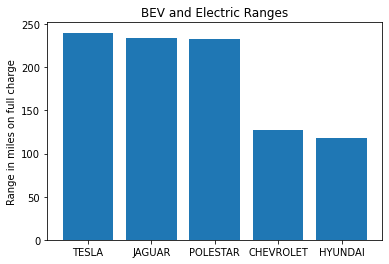

In [145]:
plt.bar(bev_series[:5].index, bev_series[:5].values)
plt.title('BEV and Electric Ranges')
plt.ylabel('Range in miles on full charge')
plt.show()

Below I am creating a dataframe to plot a scatter plot to see if there's a relationship between postal codes and Base MSRP of all the vehicles.

In [181]:
# Don't want any vehicles with 0 MSRP.
filtered_df = filtered_df[filtered_df['Base MSRP'] > 0].sort_values(by='Base MSRP', ascending=False)

filtered_df.groupby('Postal Code')['Postal Code'].count().sort_values(ascending=False)

# Identified these are the five postal codes I want to look at to make the scatter plot readable.
wanted_postal_codes = [98033.0, 98072.0, 98004.0, 98052.0, 98040.0]

filtered_df = filtered_df[filtered_df['Postal Code'].isin(wanted_postal_codes)]

filtered_df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
121122,WP0CA2A13F,King,Hunts Point,WA,98004.0,2015,PORSCHE,918,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,12,845000,48.0,100479039,POINT (-122.1872 47.61001),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
43911,WP0CH2A76J,King,Mercer Island,WA,98040.0,2018,PORSCHE,PANAMERA,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,184400,41.0,103328963,POINT (-122.21238 47.57816),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
46737,WP0AH2A76J,King,Woodinville,WA,98072.0,2018,PORSCHE,PANAMERA,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,184400,45.0,277238377,POINT (-122.15545 47.75448),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
117415,5YJRE1A14A,King,Redmond,WA,98052.0,2010,TESLA,ROADSTER,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,245,110950,48.0,203082540,POINT (-122.13158 47.67858),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
102508,5YJRE1A11A,King,Bellevue,WA,98004.0,2010,TESLA,ROADSTER,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,245,110950,48.0,137365245,POINT (-122.1872 47.61001),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10


I was trying to fix the spacing between the x labels but couldn't figure it out. See below.

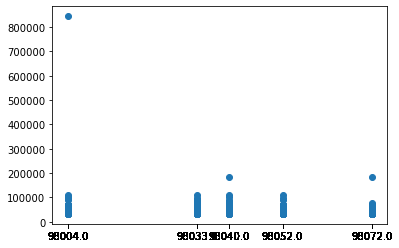

In [182]:
fig, ax = plt.subplots()
ax.scatter(filtered_df['Postal Code'], filtered_df['Base MSRP'])
ax.set_xticks(filtered_df['Postal Code'])
ax.set_xticklabels(filtered_df['Postal Code'])
plt.show()

### **Part 2:**

Recreate the visualizations above using the Seaborn library as best as possible.  


**You are required to explain what each of your plots is representing. Plots without comments will not be accepted.**  In addition, please explain the properties you are showcasing.

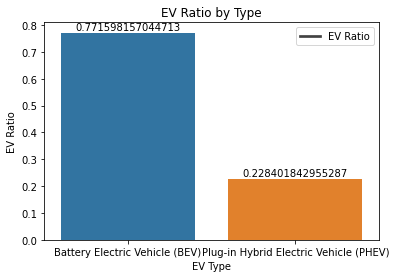

In [97]:
sns.barplot(x='EV_Type', y='EV_Ratio', data=ev_ratio_df)

# add text labels to each bar
for index, row in ev_ratio_df.iterrows():
    plt.text(index, row['EV_Ratio']+0.01, str(row['EV_Ratio']), ha='center')

plt.legend(['EV Ratio'])
plt.xlabel('EV Type')
plt.ylabel('EV Ratio')
plt.title('EV Ratio by Type')

# display the chart
plt.show()

Recreated the scatterplot but a bit more colorful. It appears that scatterplots will determine the inbetween x labels even if the values in the Postal Code column does not have those values.

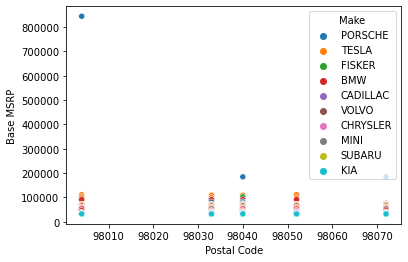

In [185]:
sns.scatterplot(x='Postal Code', y='Base MSRP', hue='Make', data=filtered_df)
plt.show()

### **Part 3:**
In a comment or text box, explain the differences between creating a plot in matplotlib and seaborn, based on your above plots.


They are both data visualization libraries. Out of the box - matplotlib seems more basic with the style and theme compared to seaborn. Seaborn comes with style themes even without being explicit about specifying different colors for different variables. I enjoy Seaborn more since I am able to accomplish more in a concise manner as evident from the scatterplot.

# Conclusions  

After exploring your dataset, provide a short summary of what you noticed from this dataset.  

Given the visualizations and data analysis - Porsche and Tesla produces the most expensive electric vehicles on the market. The dataset provides the range solely based on the electrical charge. So it was difficult to answer the question of "Which type of electrical vehicle has a longer range given full tank and full charge?" We can also see that Battery Electric Vehicles dominate the market in Washington as opposed to the Plug-in Hybrid variety.